# Model Interpretation

In [1]:
# Imports

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sbs

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import load_model

In [2]:
# Best model's arthitecture

model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dropout(0.05),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(3, activation='softmax')
    ])

In [3]:
# Load saved weights to the model

model.load_weights('./flask/assets/model84.hdf5')

model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

In [4]:
# Test directory
test_dir = './data/chest_xray/test/'

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
            test_dir,
            target_size=(150, 150),
            shuffle = False,
            class_mode='sparse',
            batch_size=1)

Found 624 images belonging to 3 classes.


In [6]:
test_filenames = test_generator.filenames
test_steps = len(test_filenames)

predictions = model.predict_generator(test_generator, steps = test_steps)

print(predictions)

[[8.8812065e-01 1.2144942e-02 9.9734381e-02]
 [9.9055111e-01 7.2836723e-05 9.3760155e-03]
 [9.7400427e-01 2.5048119e-04 2.5745321e-02]
 ...
 [4.8484340e-02 1.0416983e-01 8.4734577e-01]
 [8.5227019e-01 3.2703662e-03 1.4445953e-01]
 [9.7141290e-01 7.3583034e-04 2.7851332e-02]]


In [7]:
y_hat = np.argmax(predictions, axis = 1) 
y_true = test_generator.classes

In [8]:
len(y_hat) == len(y_true)

True

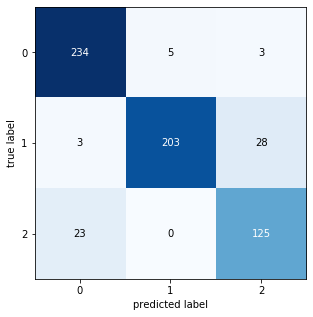

In [9]:
CM = confusion_matrix(y_true, y_hat)
fig, ax = plot_confusion_matrix(conf_mat=CM,  figsize=(5, 5))
plt.show()